
## 1. Write a program that solves AX = B with Doolittle’s decomposition method.

$$
{\bf A} = 
\begin{pmatrix} 
3 & -1 & 4 \\
-2 & 0 & 5 \\
7 & 2& -2
\end{pmatrix}
$$

$$
{\bf B} = 
\begin{pmatrix} 
6 & -4 \\
3 & 2 \\
7 & -5
\end{pmatrix}
$$


### a) Find the coefficient matrix [L/U] of Doolittle's decomposition method. <br>
### b) Solve the equations  𝐀𝐱=𝐛.

In [1]:
import numpy as np
from numpy import ndarray
def Doolittle_decomp(A : ndarray) : 
    n = len(A)

    U = A.astype(dtype=float)
    L = np.eye(N=n, dtype=float)

    for i in range(n) : 
        for j in range(i + 1, n) : 
            portion = U[j,i] / U[i,i]
            U[j,:] -= portion * U[i,:]
            L[j,i] = portion

    return L, U

def foward_substitution(A : ndarray, B : ndarray) : 
    X = np.zeros(B.shape, dtype=float)
    for i in range(len(A)) : 
        X[i] = (B[i] - np.dot(A[i,:i], X[:i])) / A[i,i]
    return X

def backward_substitution(A : ndarray, B : ndarray) : 
    X = np.zeros(B.shape, dtype=float)
    for i in range(len(A) - 1, -1, -1) : 
        X[i] = (B[i] - np.dot(A[i,i+1:], X[i+1:])) / A[i,i]
    return X

def Doolittle_solve(A : ndarray, B : ndarray) : 
    
    L, U = Doolittle_decomp(A=A)
    Y = foward_substitution(A=L, B=B)
    X = backward_substitution(A=U, B=Y)
    
    return X


In [2]:
A = np.array([
    [3, -1, 4],
    [-2, 0, 5],
    [7, 2, -2]
], dtype=float)

B = np.array([
    [6, -4],
    [3, 2],
    [7, -5]
], dtype=float)

In [3]:
X = Doolittle_solve(A, B)
x1 = X[:,0]
x2 = X[:,1]

print("x1 : ", x1)
print("x2 : ", x2)

x1 :  [1. 1. 1.]
x2 :  [-1.00000000e+00  1.00000000e+00  2.30695693e-17]


## 2. Solve the equations Ax = b by Choleski’s decomposition
$$
{\bf A} = 
\begin{pmatrix} 
1.44 & -0.36 & 5.52 &0.00\\
-0.36 &10.33 & -7.78&0.00 \\
5.52 & -7.78& 28.40&9.00 \\
0.00&0.00&9.00&61.00
\end{pmatrix}
$$

$$
{\bf B} = 
\begin{pmatrix} 
0.04  \\
-2.15 \\
0 \\
0.88
\end{pmatrix}
$$

In [4]:
import numpy as np
from numpy import ndarray
def Choleski_decomp(A : ndarray) : 
    if not np.array_equal(A, A.T) : 
        print("Given matrix A cannot be decomposite by Choleski method.")
        return
    
    L = np.zeros(A.shape, dtype=float)
    n = len(A)
    
    for i in range(n) : 
        for j in range(0, i + 1) : 
            
            try : 
                if i == j : 
                    L[j,j] = np.sqrt(A[j,j] - np.dot(L[j,:j], L[j,:j]))
                else : 
                    L[i,j] = (A[i,j] - np.dot(L[i,:j], L[j,:j])) / L[j,j]
            except : 
                print("Given matrix A is not positive definite")
                return
    
    return L, np.copy(L.T)

def foward_substitution(A : ndarray, B : ndarray) : 
    X = np.zeros(B.shape, dtype=float)
    for i in range(len(A)) : 
        X[i] = (B[i] - np.dot(A[i,:i], X[:i])) / A[i,i]
    return X

def backward_substitution(A : ndarray, B : ndarray) : 
    X = np.zeros(B.shape, dtype=float)
    for i in range(len(A) - 1, -1, -1) : 
        X[i] = (B[i] - np.dot(A[i,i+1:], X[i+1:])) / A[i,i]
    return X

def Choleski_solve(A : ndarray, B : ndarray) : 
    L, U = Choleski_decomp(A=A)

    Y = foward_substitution(A=L, B=B)
    X = backward_substitution(A=U, B=Y)

    return X

In [5]:
A = np.array([
    [1.44, -0.36, 5.52, 0],
    [-0.36, 10.33, -7.78, 0],
    [5.52, -7.78, 28.4, 9],
    [0, 0, 9, 61]
], dtype=float)

B = np.array([
    [0.04, -2.15, 0, 0.88]
], dtype=float).transpose()

print(A.shape, B.shape)

(4, 4) (4, 1)


In [6]:
X = Choleski_solve(A, B).transpose().flatten()
print(X)

[ 3.09212567 -0.73871706 -0.8475723   0.13947788]


## 3. Find L and U 
### so that
$$
{\bf A} = {\bf LU}=
\begin{pmatrix} 
4 & -1 & 0\\
-1 & 4 & -1 \\
0 & -1& 4 \\
\end{pmatrix}
$$
### using (a) Doolittle’s decomposition; (b) Choleski’s decomposition

In [7]:
A = np.array([
    [4, -1, 0],
    [-1, 4, -1],
    [0, -1, 4]
])

## (a) Doolittle's decomposition

In [8]:
L, U = Doolittle_decomp(A)
print("L : ", L, sep="\n", end="\n\n")
print("U : ", U, sep="\n", end="\n\n")

L : 
[[ 1.          0.          0.        ]
 [-0.25        1.          0.        ]
 [ 0.         -0.26666667  1.        ]]

U : 
[[ 4.         -1.          0.        ]
 [ 0.          3.75       -1.        ]
 [ 0.          0.          3.73333333]]



In [9]:
A_modified = L + U - np.eye(len(A))
print("A after LUdecomp (Doolittle) = ", A_modified, sep="\n")

A after LUdecomp (Doolittle) = 
[[ 4.         -1.          0.        ]
 [-0.25        3.75       -1.        ]
 [ 0.         -0.26666667  3.73333333]]


In [10]:
print("A = L @ U", end="\n\n")
print("A : ", A, sep="\n", end="\n\n")
print("L @ U : ", L @ U, sep="\n", end="\n\n")

A = L @ U

A : 
[[ 4 -1  0]
 [-1  4 -1]
 [ 0 -1  4]]

L @ U : 
[[ 4. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  4.]]



## (b) Choleski’s decomposition

In [ ]:
def choleski(a):
    n = len(a)
    for k in range(n):
        try:
            a[k,k] = np.sqrt(a[k,k] \
            - np.dot(a[k,0:k],a[k,0:k]))
        except :
            print("’Matrix is not positive definite’")
        for i in range(k+1,n):
            a[i,k] = (a[i,k] - np.dot(a[i,0:k],a[k,0:k]))/a[k,k]
    for k in range(1,n): 
        a[0:k,k] = 0.0
    return a

def choleskiSol(L,b):
    n = len(b)
    # Solution of [L]{y} = {b}
    for k in range(n):
        b[k] = (b[k] - np.dot(L[k,0:k],b[0:k]))/L[k,k]
    # Solution of [L_transpose]{x} = {y}
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(L[k+1:n,k],b[k+1:n]))/L[k,k]
    return b

In [11]:
L, L_T = Choleski_decomp(A)
print("L : ", L, sep="\n", end="\n\n")
print("L_T : ", L_T, sep="\n", end="\n\n")


L : 
[[ 2.          0.          0.        ]
 [-0.5         1.93649167  0.        ]
 [ 0.         -0.51639778  1.93218357]]

L_T : 
[[ 2.         -0.5         0.        ]
 [ 0.          1.93649167 -0.51639778]
 [ 0.          0.          1.93218357]]



In [12]:
A_modified = L
print("A after LUdecomp (Doolittle) = ", A_modified, sep="\n")

A after LUdecomp (Doolittle) = 
[[ 2.          0.          0.        ]
 [-0.5         1.93649167  0.        ]
 [ 0.         -0.51639778  1.93218357]]


In [13]:
print("A = L @ L_T", end="\n\n")
print("A : ", A, sep="\n", end="\n\n")
print("L @ L_T : ", L @ L_T, sep="\n", end="\n\n")

A = L @ L_T

A : 
[[ 4 -1  0]
 [-1  4 -1]
 [ 0 -1  4]]

L @ L_T : 
[[ 4. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  4.]]



## 4. Determine the fourth-degree polynomial y(x) that passes through the points (0, −1), (1, 1), (3, 3), (5, 2), and (6, −2). 

$y = ax^{4} + bx^{3} + cx^{2} + dx + e$

$$
\begin{pmatrix}
6^4 & 6^3 & 6^2 & 6 & 1\\
5^4 & 5^3 & 5^2 & 5 & 1\\
3^4 & 3^3 & 3^2 & 3 & 1\\
1 & 1 & 1 & 1 & 1\\
0 & 0 & 0 & 0 & 1\\
\end{pmatrix}
\begin{pmatrix}
a \\
b \\
c \\
d \\
e \\
\end{pmatrix}
=
\begin{pmatrix}
-2 \\
2 \\
3 \\
1 \\
-1 \\
\end{pmatrix}
$$

In [14]:
A = np.array([
    [6**i for i in range(4,-1,-1)],
    [5**i for i in range(4,-1,-1)],
    [3**i for i in range(4,-1,-1)],
    [1,1,1,1,1],
    [0,0,0,0,1]
], dtype=float)

B = np.array([
    [-2, 2, 3, 1, -1]
], dtype=float).transpose()

In [15]:
solution = Doolittle_solve(A, B)
a, b, c, d, e = [value for value in solution] 
print(a, b, c, d, e)
print(f"y = {a[0]}x^4 + {b[0]}x^3 + {c[0]}x^2 + {d[0]}x + {e[0]}")

[-0.025] [0.21666667] [-0.875] [2.68333333] [-1.]
y = -0.024999999999999918x^4 + 0.21666666666666587x^3 + -0.8749999999999978x^2 + 2.683333333333332x + -1.0


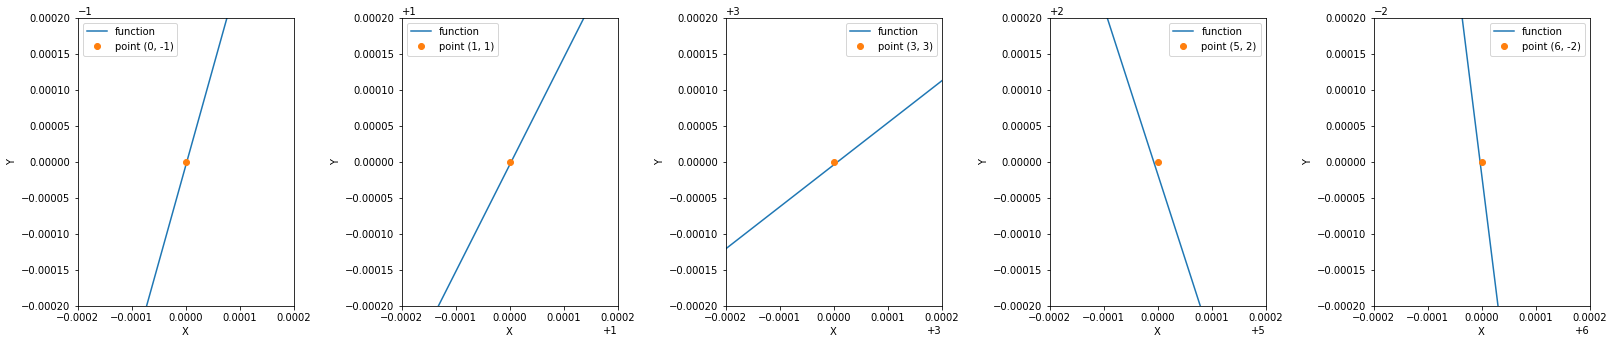

In [16]:
import matplotlib.pyplot as plt

x = np.linspace(-1, 7, 1000)
y = a*(x**4) + b*(x**3) + c*(x**2) + d*x + e

zoom = 500
point_list = [
    [0,-1],
    [1,1],
    [3,3],
    [5,2],
    [6,-2]
]

fig = plt.figure(figsize=(3,4))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([1.5,0,1,1])
ax3 = fig.add_axes([1.5 * 2,0,1,1])
ax4 = fig.add_axes([1.5 * 3,0,1,1])
ax5 = fig.add_axes([1.5 * 4,0,1,1])

ax_list = [ax1, ax2, ax3, ax4, ax5]

for axes, point in zip(ax_list, point_list) : 
    axes.plot(x, y, label="function")
    axes.plot(point[0], point[1],'o', label="point ({}, {})".format(point[0], point[1]))
    axes.set_xlim([point[0] - 0.1 / zoom, point[0] + 0.1 / zoom])
    axes.set_ylim([point[1] - 0.1 / zoom, point[1] + 0.1 / zoom])
    axes.legend()
    axes.set_xlabel("X")
    axes.set_ylabel("Y")
